In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import json


In [2]:
annotations_file_path = '/face_dataset_krishnanand/annotation.json'
with open(annotations_file_path, 'r') as annotations_file:
    annotations_json = json.load(annotations_file)
    for annotation_row in annotations_json.values():
        print(annotation_row)
        break

{'filename': 'img_001.jpg', 'size': 22399, 'regions': [{'shape_attributes': {'name': 'rect', 'x': 67, 'y': 169, 'width': 61, 'height': 106}, 'region_attributes': {'class': 'Left'}}, {'shape_attributes': {'name': 'rect', 'x': 189, 'y': 132, 'width': 96, 'height': 155}, 'region_attributes': {'class': 'Left'}}], 'file_attributes': {}}


In [3]:
heights = []
widths = []
with open(annotations_file_path, 'r') as annotations_file:
    annotations_json = json.load(annotations_file)
    for annotation_row in annotations_json.values():
        for region in annotation_row['regions']:
            heights.append(region['shape_attributes']['height'])
            widths.append(region['shape_attributes']['width'])

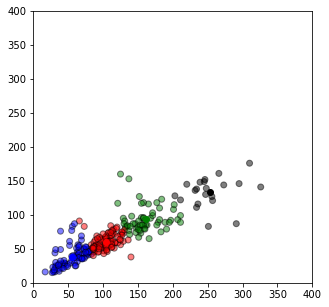

In [4]:
df = pd.DataFrame({
    'height': heights,
    'width': widths
})

kmeans = KMeans(n_clusters=4)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'k'}
fig = plt.figure(figsize=(5, 5))

colors = list(map(lambda x: colmap[x+1], labels))

plt.scatter(df['height'], df['width'], color=colors, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(0, 400)
plt.ylim(0, 400)
plt.show()

In [7]:
print('height', '          width')
for centroid in centroids:
    print(centroid[0], centroid[1])

height           width
104.527472527 60.6263736264
160.965517241 93.5517241379
55.6705882353 38.6588235294
253.333333333 133.333333333
